# Bibliotecas Usadas no Relatório

In [1]:
import time
import numpy as np
from matplotlib import pyplot as plt


# Desenho do Experimento

1. Comparar os tempos de atribuições explícitas
2. Estimar o tempo de atribuição no sistema computacional dos integrantes da equipe


# Configurações Possíveis:

Para medir os tempos vamos executar loops grandes executando apenas atribuições.
Os loops estarão no código principal(in line of code)

In [2]:
n = 10000000

tic = time.time()

for i in range(n):
    a = 1

toc = time.time()

t = toc-tic

print("Tempo do loop de atribuição explícita:",t,"segundos")

Tempo do loop de atribuição explícita: 1.0820953845977783 segundos


### Como o tempo de execução varia toda vez que o loop é executado, é preciso repetir para encontrar o valor médio.

### Abordagem comum: Definir um número fixo de repetições.
### Abordagem correta: Definir um critério de convergência estatística para parar quanto o critério for satisfeito.

1. Os tempos de execução terão uma determinada distribuição de probabilidade
2. Os tempos muito altos e muito pequenos serão menos frequentes(prováveis),que os tempos nem muito altos nem muito baixo.

### Usar a média e o desvio padrão para monitorar a distribuição dos tempo medidos e ver quando os valores coletados permitem fazer uma estimativa "confiável".

* Média = O que estamos estimando.
* Desvio Padrão = Mede a variabilidade na prática do tempo em relação a média. Se a variabilidade for muito alta o experimento não é confiável.

### Conforme o experimento é medido mais vezes, tanto a média de duração, quanto o seu desvio padrão, tende ao seu valor real, repetimos o experimento até que essa tendência seja confirmada.

### O processo mediante o qual média e o desvio padrão se estabilizam é chamado de convergência ao estado confiável.

### Será utilizado método para monitorar a convergência de qualquer variável Y (tempo médio e desvio padrão) que depende de uma variável independente m(número de repetições no loop), Y (tempo médio e desvio padrão) que depende de uma variável independente m(número de repetições no loop)representa-se a variação de Y com m da forma Y(m). "Ypsilon em função de eme"

### Para ver se Y convergiu vamos olhar as últimas w repetições e ver se a diferença entre o máximo e o mínimo valor de Y, dividido pelo valor médio de Y nessas últimas w repetições, for menor que certo limiar de tolerância que definimos. Se for menor consideramos que Y convergiu.

### Será utilizado a tolerância de 0.015, que significa que uma variável que oscila +/- 1.5 em torno da média, será considerada estabilizada.

* Y(m) é a média ou o desvio padrão do tempo das m repetições do laço.

### Lembrando que cada laço implica realizar n atribuições explícitas ou implícitas + operações de gestão do laço.

In [3]:
w = 15
tol = 0.025

n = 10000000
m = 300
t=[]
m_exp=[]
d_exp=[]

for r in range(m):
    tic = time.time()
    for i in range(n):
        a=1
    toc = time.time()
    t.append(toc-tic)

    m_exp.append(np.mean(t))
    d_exp.append(np.std(t))


    conv=[0,0]
    if r>w-1:
        if conv[0]==0:
            med_med=np.mean(m_exp[-w:-1])
            med_max=np.max(m_exp[-w:-1])
            med_min=np.min(m_exp[-w:-1])
            med_var=(med_max-med_min)/2/med_med
            if med_var<tol:
                #print("Media estabilizada após",r,"repetições do experimento")
                conv[0]=1
        if conv[1]==0:
            std_med=np.mean(d_exp[-w:-1])
            std_max=np.max(d_exp[-w:-1])
            std_min=np.min(d_exp[-w:-1])
            std_var=(std_max-std_min)/2/std_med
            if std_var<tol:
                #print("Desvio padrão estabilizado após",r,"repetições do experimento")
                conv[1]=1

    if np.sum(conv)==2:
        print("Média e Desvio Padrão estabilizados após",r,"Repetições")
        break
    

Média e Desvio Padrão estabilizados após 113 Repetições


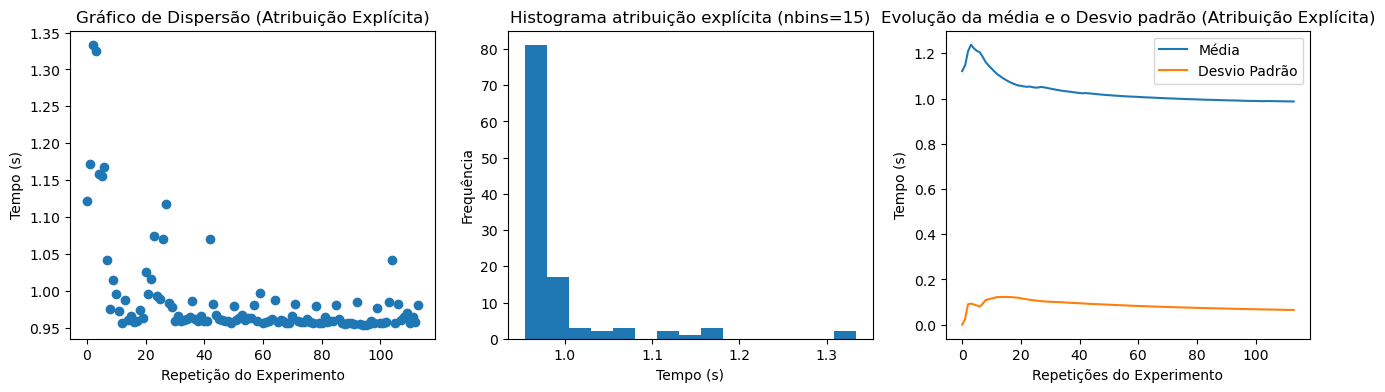

In [4]:
fig, ax = plt.subplots(1,3, figsize=(16,4))

ax[0].scatter(range(len(t)),t)
ax[0].set_title("Gráfico de Dispersão (Atribuição Explícita)")
ax[0].set_xlabel("Repetição do Experimento")
ax[0].set_ylabel("Tempo (s)")

nbins = 15
ax[1].hist(t,nbins)
ax[1].set_title("Histograma atribuição explícita (nbins="+str(nbins)+")")
ax[1].set_xlabel("Tempo (s)")
ax[1].set_ylabel("Frequência")

ax[2].plot(m_exp,label='Média')
ax[2].plot(d_exp,label='Desvio Padrão')
ax[2].legend(['Média','Desvio Padrão'])
ax[2].set_title("Evolução da média e o Desvio padrão (Atribuição Explícita)")
ax[2].set_xlabel("Repetições do Experimento")
ax[2].set_ylabel("Tempo (s)")

plt.show()
                 

In [5]:
print("Critério ", d_exp[-1]/m_exp[-1],"<= 0.15?")

Critério  0.06590671965282545 <= 0.15?


# ANÁLISE DO RESULTADO

In [6]:
print("O tempo médio do loop que realiza",n,"atribuições explícitas é", m_exp[-1],"(s)\n")
print("A dispersão do tempo do loop que realiza",n,"atribuições explícitas é",d_exp[-1],"(s)\n")
print("Então, se a distribuição de probabilidade for normal(Gaussiana), o tempo esperado do loop que realiza \n"
      ,n,"atribuições explícitas varia no intervalo", m_exp[-1],"+/-", 2*d_exp[-1],"(s) considerando +/- 2 desvio padrão\n")
min_exp=(m_exp[-1]-2*d_exp[-1])
max_exp=(m_exp[-1]+2*d_exp[-1])
print("De acordo com isto, o tempo médio do loop de",n,"Atribuições explícitas varia no intervalo [",min_exp,",",max_exp,"](s)")

O tempo médio do loop que realiza 10000000 atribuições explícitas é 0.9870563787326478 (s)

A dispersão do tempo do loop que realiza 10000000 atribuições explícitas é 0.06505364803466572 (s)

Então, se a distribuição de probabilidade for normal(Gaussiana), o tempo esperado do loop que realiza 
 10000000 atribuições explícitas varia no intervalo 0.9870563787326478 +/- 0.13010729606933144 (s) considerando +/- 2 desvio padrão

De acordo com isto, o tempo médio do loop é de  10000000 Atribuições explícitas varia no intervalo [ 0.8569490826633164 , 1.1171636748019793 ](s)
